# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
import muse_inference
from muse_inference import MuseProblem
import numpy as np

In [3]:
θ_true = 1.

## With numpy

### Scalar

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = prob.solve(0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

 10%|█         | 102/1010 [00:00<00:00, 969.81it/s]

 20%|██        | 203/1010 [00:00<00:00, 973.32it/s]

 30%|███       | 306/1010 [00:00<00:00, 997.97it/s]

 40%|████      | 409/1010 [00:00<00:00, 1009.89it/s]

 51%|█████     | 514/1010 [00:00<00:00, 1022.05it/s]

 61%|██████▏   | 619/1010 [00:00<00:00, 1031.07it/s]

 72%|███████▏  | 723/1010 [00:00<00:00, 1032.47it/s]

 82%|████████▏ | 827/1010 [00:00<00:00, 1033.43it/s]

100%|██████████| 1010/1010 [00:00<00:00, 1135.85it/s]

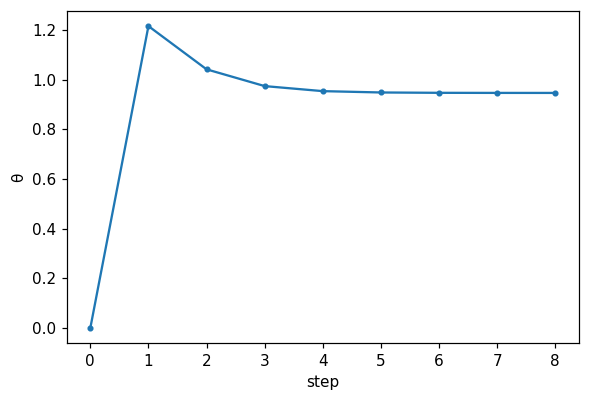

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [8]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        (θ1, θ2) = θ
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ((x1,x2), (z1,z2))
    
    def gradθ_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        return (np.sum(z1**2)/(2*np.exp(θ1)) - self.N/2, np.sum(z2**2)/(2*np.exp(θ2)) - self.N/2)
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        logLike = -(np.sum((x1 - z1)**2) + np.sum(z1**2) / np.exp(θ1) + 512*θ1) / 2 -(np.sum((x2 - z2)**2) + np.sum(z2**2) / np.exp(θ2) + 512*θ2) / 2
        gradz_logLike = (x1 - z1 * (1 + np.exp(-θ1)), x2 - z2 * (1 + np.exp(-θ2)))
        return (logLike, gradz_logLike)
    
    def gradθ_and_hessθ_logPrior(self, θ):
        (θ1, θ2) = θ
        g = (-θ1/(3**2), -θ2/(3**2))
        H = ((-1/3**2, 0),
              (0,      -1/3**2))
        return g, H

In [9]:
prob = NumpyFunnelMuseProblem(2048)
θ = (-1., 5.)
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [10]:
result = prob.solve(θ, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  1%|          | 10/1010 [00:00<00:10, 97.89it/s]

  3%|▎         | 28/1010 [00:00<00:06, 144.38it/s]

  5%|▍         | 47/1010 [00:00<00:05, 162.47it/s]

  7%|▋         | 66/1010 [00:00<00:05, 172.09it/s]

  8%|▊         | 84/1010 [00:00<00:06, 153.99it/s]

 10%|█         | 102/1010 [00:00<00:06, 150.63it/s]

 12%|█▏        | 123/1010 [00:00<00:05, 166.26it/s]

 14%|█▍        | 140/1010 [00:00<00:05, 155.67it/s]

 16%|█▌        | 160/1010 [00:01<00:05, 168.04it/s]

 18%|█▊        | 178/1010 [00:01<00:05, 158.35it/s]

 20%|█▉        | 199/1010 [00:01<00:04, 171.66it/s]

 21%|██▏       | 217/1010 [00:01<00:05, 153.71it/s]

 23%|██▎       | 233/1010 [00:01<00:05, 150.49it/s]

 25%|██▌       | 257/1010 [00:01<00:04, 172.71it/s]

 28%|██▊       | 281/1010 [00:01<00:03, 189.24it/s]

 30%|██▉       | 301/1010 [00:01<00:04, 177.08it/s]

 32%|███▏      | 320/1010 [00:01<00:03, 175.96it/s]

 34%|███▍      | 341/1010 [00:02<00:03, 168.87it/s]

 36%|███▌      | 365/1010 [00:02<00:03, 186.29it/s]

 38%|███▊      | 385/1010 [00:02<00:03, 176.58it/s]

 40%|████      | 404/1010 [00:02<00:03, 169.84it/s]

 42%|████▏     | 422/1010 [00:02<00:03, 169.87it/s]

 44%|████▍     | 445/1010 [00:02<00:03, 185.28it/s]

 46%|████▌     | 466/1010 [00:02<00:03, 175.30it/s]

 48%|████▊     | 489/1010 [00:02<00:02, 188.61it/s]

 50%|█████     | 509/1010 [00:02<00:02, 184.62it/s]

 52%|█████▏    | 528/1010 [00:03<00:02, 173.29it/s]

 54%|█████▍    | 547/1010 [00:03<00:02, 165.97it/s]

 56%|█████▋    | 570/1010 [00:03<00:02, 181.66it/s]

 58%|█████▊    | 589/1010 [00:03<00:02, 171.26it/s]

 60%|██████    | 607/1010 [00:03<00:02, 171.51it/s]

 62%|██████▏   | 631/1010 [00:03<00:02, 189.01it/s]

 64%|██████▍   | 651/1010 [00:03<00:02, 178.78it/s]

 67%|██████▋   | 675/1010 [00:03<00:01, 193.81it/s]

 69%|██████▉   | 695/1010 [00:04<00:01, 181.50it/s]

 71%|███████   | 714/1010 [00:04<00:01, 180.95it/s]

 73%|███████▎  | 733/1010 [00:04<00:01, 172.98it/s]

 74%|███████▍  | 751/1010 [00:04<00:01, 166.35it/s]

 77%|███████▋  | 775/1010 [00:04<00:01, 185.48it/s]

 79%|███████▉  | 799/1010 [00:04<00:01, 199.85it/s]

 81%|████████  | 820/1010 [00:04<00:01, 175.34it/s]

 84%|████████▎ | 844/1010 [00:04<00:00, 191.13it/s]

 86%|████████▌ | 864/1010 [00:04<00:00, 180.38it/s]

 88%|████████▊ | 888/1010 [00:05<00:00, 194.97it/s]

 90%|█████████ | 909/1010 [00:05<00:00, 183.27it/s]

 92%|█████████▏| 928/1010 [00:05<00:00, 164.29it/s]

 94%|█████████▍| 952/1010 [00:05<00:00, 182.67it/s]

 97%|█████████▋| 976/1010 [00:05<00:00, 196.96it/s]

 99%|█████████▊| 997/1010 [00:05<00:00, 184.38it/s]

100%|██████████| 1010/1010 [00:05<00:00, 175.95it/s]

In [11]:
result.history[-1]["θ"]

(-1.0629377565878193, 4.9796990924522655)

## With Jax

In [12]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem, JaxMuseProblem

### Scalar

In [13]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (jnp.array(x), jnp.array(z))

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)

In [14]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [15]:
result = prob.solve(0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<28:10,  1.68s/it]

  1%|          | 9/1010 [00:01<02:26,  6.83it/s]

  2%|▏         | 18/1010 [00:01<01:05, 15.18it/s]

  3%|▎         | 27/1010 [00:01<00:40, 24.47it/s]

  4%|▎         | 36/1010 [00:02<00:28, 34.28it/s]

  5%|▍         | 47/1010 [00:02<00:20, 47.06it/s]

  6%|▌         | 58/1010 [00:02<00:16, 58.68it/s]

  7%|▋         | 68/1010 [00:02<00:14, 65.23it/s]

  8%|▊         | 77/1010 [00:02<00:13, 68.82it/s]

  9%|▊         | 86/1010 [00:02<00:12, 73.21it/s]

 10%|▉         | 97/1010 [00:02<00:11, 81.66it/s]

 11%|█         | 107/1010 [00:04<01:04, 13.91it/s]

 12%|█▏        | 118/1010 [00:04<00:46, 19.38it/s]

 13%|█▎        | 128/1010 [00:05<00:34, 25.40it/s]

 14%|█▍        | 139/1010 [00:05<00:26, 33.49it/s]

 15%|█▍        | 150/1010 [00:05<00:20, 42.56it/s]

 16%|█▌        | 161/1010 [00:05<00:16, 52.18it/s]

 17%|█▋        | 172/1010 [00:05<00:13, 61.69it/s]

 18%|█▊        | 183/1010 [00:05<00:11, 69.71it/s]

 19%|█▉        | 194/1010 [00:05<00:10, 77.82it/s]

 20%|██        | 205/1010 [00:05<00:14, 54.49it/s]

 21%|██▏       | 215/1010 [00:06<00:12, 61.75it/s]

 22%|██▏       | 226/1010 [00:06<00:11, 70.71it/s]

 23%|██▎       | 236/1010 [00:06<00:10, 76.39it/s]

 24%|██▍       | 246/1010 [00:06<00:09, 81.04it/s]

 25%|██▌       | 256/1010 [00:06<00:08, 85.28it/s]

 26%|██▋       | 266/1010 [00:06<00:08, 86.32it/s]

 27%|██▋       | 276/1010 [00:06<00:08, 89.25it/s]

 28%|██▊       | 287/1010 [00:06<00:07, 93.78it/s]

 30%|██▉       | 298/1010 [00:06<00:07, 96.38it/s]

 30%|███       | 308/1010 [00:07<00:08, 86.27it/s]

 32%|███▏      | 321/1010 [00:07<00:07, 96.52it/s]

 33%|███▎      | 337/1010 [00:07<00:06, 112.05it/s]

 35%|███▍      | 351/1010 [00:07<00:05, 117.87it/s]

 36%|███▌      | 364/1010 [00:07<00:05, 120.11it/s]

 37%|███▋      | 378/1010 [00:07<00:05, 124.65it/s]

 39%|███▊      | 391/1010 [00:07<00:04, 125.72it/s]

 40%|████      | 404/1010 [00:07<00:04, 123.85it/s]

 41%|████▏     | 417/1010 [00:07<00:05, 106.02it/s]

 42%|████▏     | 429/1010 [00:08<00:05, 109.55it/s]

 44%|████▍     | 443/1010 [00:08<00:04, 117.06it/s]

 45%|████▌     | 459/1010 [00:08<00:04, 127.61it/s]

 47%|████▋     | 473/1010 [00:08<00:04, 130.20it/s]

 48%|████▊     | 487/1010 [00:08<00:04, 130.67it/s]

 50%|████▉     | 501/1010 [00:08<00:03, 130.17it/s]

 51%|█████     | 515/1010 [00:08<00:04, 112.20it/s]

 53%|█████▎    | 531/1010 [00:08<00:03, 123.37it/s]

 54%|█████▍    | 547/1010 [00:08<00:03, 131.87it/s]

 56%|█████▌    | 563/1010 [00:09<00:03, 138.79it/s]

 57%|█████▋    | 579/1010 [00:09<00:03, 143.38it/s]

 59%|█████▉    | 594/1010 [00:09<00:02, 139.15it/s]

 60%|██████    | 609/1010 [00:09<00:03, 117.20it/s]

 62%|██████▏   | 625/1010 [00:09<00:03, 126.38it/s]

 63%|██████▎   | 641/1010 [00:09<00:02, 133.89it/s]

 65%|██████▌   | 657/1010 [00:09<00:02, 139.41it/s]

 67%|██████▋   | 673/1010 [00:09<00:02, 143.96it/s]

 68%|██████▊   | 689/1010 [00:09<00:02, 146.72it/s]

 70%|██████▉   | 705/1010 [00:10<00:02, 149.03it/s]

 71%|███████▏  | 721/1010 [00:10<00:02, 125.08it/s]

 73%|███████▎  | 735/1010 [00:10<00:02, 126.07it/s]

 74%|███████▍  | 749/1010 [00:10<00:02, 129.10it/s]

 76%|███████▌  | 763/1010 [00:10<00:01, 129.95it/s]

 77%|███████▋  | 777/1010 [00:10<00:01, 129.28it/s]

 78%|███████▊  | 792/1010 [00:10<00:01, 134.68it/s]

 80%|████████  | 808/1010 [00:10<00:01, 140.39it/s]

 81%|████████▏ | 823/1010 [00:11<00:01, 124.21it/s]

 83%|████████▎ | 839/1010 [00:11<00:01, 132.56it/s]

 85%|████████▍ | 855/1010 [00:11<00:01, 138.67it/s]

 86%|████████▌ | 871/1010 [00:11<00:00, 144.39it/s]

 88%|████████▊ | 886/1010 [00:11<00:00, 141.72it/s]

 89%|████████▉ | 901/1010 [00:11<00:00, 138.67it/s]

 91%|█████████ | 916/1010 [00:11<00:00, 122.22it/s]

 92%|█████████▏| 933/1010 [00:11<00:00, 132.30it/s]

 94%|█████████▍| 949/1010 [00:11<00:00, 137.66it/s]

 96%|█████████▌| 966/1010 [00:12<00:00, 144.58it/s]

 97%|█████████▋| 983/1010 [00:12<00:00, 149.09it/s]

 99%|█████████▉| 1000/1010 [00:12<00:00, 153.35it/s]

100%|██████████| 1010/1010 [00:12<00:00, 81.69it/s] 

In [16]:
[h["θ"] for h in result.history]

[0.0,
 DeviceArray(1.2127951, dtype=float32),
 DeviceArray(1.0396029, dtype=float32),
 DeviceArray(0.97261405, dtype=float32),
 DeviceArray(0.952539, dtype=float32),
 DeviceArray(0.94721234, dtype=float32),
 DeviceArray(0.94585395, dtype=float32),
 DeviceArray(0.94551116, dtype=float32),
 DeviceArray(0.94534713, dtype=float32),
 DeviceArray(0.9453871, dtype=float32)]

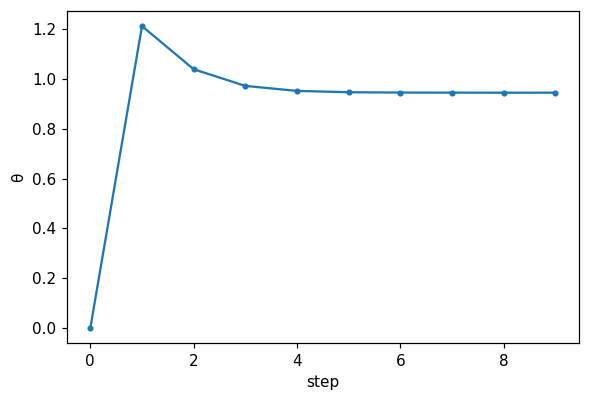

In [17]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [18]:
class JaxFunnelMuseProblem(muse_inference.jax.JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        (θ1, θ2) = (θ["θ1"], θ["θ2"])
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ({"x1":x1, "x2":x2}, {"z1":z1, "z2":z2})

    def logLike(self, x, z, θ):
        return (
            -(jnp.sum((x["x1"] - z["z1"])**2) + jnp.sum(z["z1"]**2) / jnp.exp(θ["θ1"]) + 512*θ["θ1"]) / 2
            -(jnp.sum((x["x2"] - z["z2"])**2) + jnp.sum(z["z2"]**2) / jnp.exp(θ["θ2"]) + 512*θ["θ2"]) / 2
        )
    
    def logPrior(self, θ):
        return -θ["θ1"]**2 / (2*3**2) - θ["θ2"]**2 / (2*3**2)

In [19]:
prob = JaxFunnelMuseProblem(512)
θ = {"θ1":1., "θ2":2.}
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [20]:
result = prob.solve(θ, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<33:23,  1.99s/it]

  0%|          | 2/1010 [00:02<14:53,  1.13it/s]

  0%|          | 3/1010 [00:02<08:57,  1.87it/s]

  0%|          | 4/1010 [00:02<06:09,  2.72it/s]

  0%|          | 5/1010 [00:02<04:37,  3.62it/s]

  1%|          | 6/1010 [00:02<03:41,  4.54it/s]

  1%|          | 7/1010 [00:02<03:06,  5.39it/s]

  1%|          | 8/1010 [00:02<02:44,  6.10it/s]

  1%|          | 9/1010 [00:02<02:29,  6.69it/s]

  1%|          | 10/1010 [00:03<02:19,  7.16it/s]

  1%|          | 11/1010 [00:03<02:11,  7.60it/s]

  1%|          | 12/1010 [00:03<02:06,  7.90it/s]

  1%|▏         | 13/1010 [00:03<02:01,  8.20it/s]

  1%|▏         | 14/1010 [00:03<01:58,  8.42it/s]

  1%|▏         | 15/1010 [00:03<01:55,  8.59it/s]

  2%|▏         | 16/1010 [00:03<01:54,  8.68it/s]

  2%|▏         | 17/1010 [00:03<01:53,  8.76it/s]

  2%|▏         | 18/1010 [00:03<01:52,  8.78it/s]

  2%|▏         | 19/1010 [00:04<01:52,  8.83it/s]

  2%|▏         | 20/1010 [00:04<01:51,  8.92it/s]

  2%|▏         | 21/1010 [00:04<01:51,  8.87it/s]

  2%|▏         | 22/1010 [00:04<01:51,  8.89it/s]

  2%|▏         | 23/1010 [00:04<01:51,  8.84it/s]

  2%|▏         | 24/1010 [00:04<01:50,  8.89it/s]

  2%|▏         | 25/1010 [00:04<01:50,  8.91it/s]

  3%|▎         | 26/1010 [00:04<01:50,  8.90it/s]

  3%|▎         | 27/1010 [00:04<01:50,  8.91it/s]

  3%|▎         | 28/1010 [00:05<01:51,  8.83it/s]

  3%|▎         | 29/1010 [00:05<01:51,  8.84it/s]

  3%|▎         | 30/1010 [00:05<01:52,  8.73it/s]

  3%|▎         | 31/1010 [00:05<01:51,  8.77it/s]

  3%|▎         | 32/1010 [00:05<01:50,  8.84it/s]

  3%|▎         | 33/1010 [00:05<01:49,  8.89it/s]

  3%|▎         | 34/1010 [00:05<01:50,  8.86it/s]

  3%|▎         | 35/1010 [00:05<01:49,  8.92it/s]

  4%|▎         | 36/1010 [00:05<01:48,  8.95it/s]

  4%|▎         | 37/1010 [00:06<01:49,  8.86it/s]

  4%|▍         | 38/1010 [00:06<01:50,  8.77it/s]

  4%|▍         | 39/1010 [00:06<01:50,  8.77it/s]

  4%|▍         | 40/1010 [00:06<01:50,  8.80it/s]

  4%|▍         | 41/1010 [00:06<01:49,  8.88it/s]

  4%|▍         | 42/1010 [00:06<01:48,  8.92it/s]

  4%|▍         | 43/1010 [00:06<01:48,  8.94it/s]

  4%|▍         | 44/1010 [00:06<01:48,  8.92it/s]

  4%|▍         | 45/1010 [00:06<01:48,  8.89it/s]

  5%|▍         | 46/1010 [00:07<01:50,  8.76it/s]

  5%|▍         | 47/1010 [00:07<01:50,  8.72it/s]

  5%|▍         | 48/1010 [00:07<01:50,  8.68it/s]

  5%|▍         | 49/1010 [00:07<01:50,  8.70it/s]

  5%|▍         | 50/1010 [00:07<01:50,  8.73it/s]

  5%|▌         | 51/1010 [00:07<01:49,  8.79it/s]

  5%|▌         | 52/1010 [00:07<01:53,  8.43it/s]

  5%|▌         | 53/1010 [00:07<01:52,  8.52it/s]

  5%|▌         | 54/1010 [00:08<01:50,  8.69it/s]

  5%|▌         | 55/1010 [00:08<01:50,  8.62it/s]

  6%|▌         | 56/1010 [00:08<01:50,  8.60it/s]

  6%|▌         | 57/1010 [00:08<01:49,  8.72it/s]

  6%|▌         | 58/1010 [00:08<01:48,  8.79it/s]

  6%|▌         | 59/1010 [00:08<01:48,  8.79it/s]

  6%|▌         | 60/1010 [00:08<01:46,  8.88it/s]

  6%|▌         | 61/1010 [00:08<01:47,  8.83it/s]

  6%|▌         | 62/1010 [00:08<01:48,  8.75it/s]

  6%|▌         | 63/1010 [00:09<01:47,  8.80it/s]

  6%|▋         | 64/1010 [00:09<01:47,  8.83it/s]

  6%|▋         | 65/1010 [00:09<01:50,  8.51it/s]

  7%|▋         | 66/1010 [00:09<01:50,  8.52it/s]

  7%|▋         | 67/1010 [00:09<01:49,  8.65it/s]

  7%|▋         | 68/1010 [00:09<01:48,  8.67it/s]

  7%|▋         | 69/1010 [00:09<01:47,  8.73it/s]

  7%|▋         | 70/1010 [00:09<01:47,  8.74it/s]

  7%|▋         | 71/1010 [00:09<01:46,  8.84it/s]

  7%|▋         | 72/1010 [00:10<01:46,  8.80it/s]

  7%|▋         | 73/1010 [00:10<01:46,  8.76it/s]

  7%|▋         | 74/1010 [00:10<01:46,  8.80it/s]

  7%|▋         | 75/1010 [00:10<01:47,  8.73it/s]

  8%|▊         | 76/1010 [00:10<01:46,  8.79it/s]

  8%|▊         | 77/1010 [00:10<01:45,  8.80it/s]

  8%|▊         | 78/1010 [00:10<01:46,  8.76it/s]

  8%|▊         | 79/1010 [00:10<01:45,  8.79it/s]

  8%|▊         | 80/1010 [00:10<01:45,  8.78it/s]

  8%|▊         | 81/1010 [00:11<01:45,  8.83it/s]

  8%|▊         | 82/1010 [00:11<01:45,  8.77it/s]

  8%|▊         | 83/1010 [00:11<01:45,  8.81it/s]

  8%|▊         | 84/1010 [00:11<01:45,  8.81it/s]

  8%|▊         | 85/1010 [00:11<01:45,  8.76it/s]

  9%|▊         | 86/1010 [00:11<01:44,  8.81it/s]

  9%|▊         | 87/1010 [00:11<01:45,  8.74it/s]

  9%|▊         | 88/1010 [00:11<01:45,  8.73it/s]

  9%|▉         | 89/1010 [00:12<01:45,  8.77it/s]

  9%|▉         | 90/1010 [00:12<01:45,  8.72it/s]

  9%|▉         | 91/1010 [00:12<01:45,  8.74it/s]

  9%|▉         | 92/1010 [00:12<01:44,  8.76it/s]

  9%|▉         | 93/1010 [00:12<01:44,  8.74it/s]

  9%|▉         | 94/1010 [00:12<01:44,  8.81it/s]

  9%|▉         | 95/1010 [00:12<01:43,  8.84it/s]

 10%|▉         | 96/1010 [00:12<01:42,  8.91it/s]

 10%|▉         | 97/1010 [00:12<01:44,  8.75it/s]

 10%|▉         | 98/1010 [00:13<01:44,  8.75it/s]

 10%|▉         | 99/1010 [00:13<01:45,  8.65it/s]

 10%|▉         | 100/1010 [00:13<01:45,  8.66it/s]

 10%|█         | 101/1010 [00:13<01:44,  8.66it/s]

 10%|█         | 102/1010 [00:16<13:31,  1.12it/s]

 10%|█         | 104/1010 [00:16<08:00,  1.89it/s]

 10%|█         | 105/1010 [00:16<06:34,  2.29it/s]

 11%|█         | 107/1010 [00:16<04:24,  3.42it/s]

 11%|█         | 109/1010 [00:16<03:15,  4.61it/s]

 11%|█         | 111/1010 [00:16<02:35,  5.79it/s]

 11%|█         | 113/1010 [00:17<02:11,  6.85it/s]

 11%|█▏        | 115/1010 [00:17<01:55,  7.77it/s]

 12%|█▏        | 117/1010 [00:17<01:44,  8.58it/s]

 12%|█▏        | 119/1010 [00:17<01:36,  9.19it/s]

 12%|█▏        | 121/1010 [00:17<01:31,  9.70it/s]

 12%|█▏        | 123/1010 [00:18<01:28, 10.06it/s]

 12%|█▏        | 125/1010 [00:18<01:27, 10.13it/s]

 13%|█▎        | 127/1010 [00:18<01:25, 10.32it/s]

 13%|█▎        | 129/1010 [00:18<01:23, 10.58it/s]

 13%|█▎        | 131/1010 [00:18<01:22, 10.72it/s]

 13%|█▎        | 133/1010 [00:19<01:20, 10.84it/s]

 13%|█▎        | 135/1010 [00:19<01:19, 10.97it/s]

 14%|█▎        | 137/1010 [00:19<01:19, 11.02it/s]

 14%|█▍        | 139/1010 [00:19<01:18, 11.03it/s]

 14%|█▍        | 141/1010 [00:19<01:18, 11.03it/s]

 14%|█▍        | 143/1010 [00:19<01:18, 11.11it/s]

 14%|█▍        | 145/1010 [00:20<01:17, 11.16it/s]

 15%|█▍        | 147/1010 [00:20<01:18, 10.94it/s]

 15%|█▍        | 149/1010 [00:20<01:18, 10.97it/s]

 15%|█▍        | 151/1010 [00:20<01:18, 10.99it/s]

 15%|█▌        | 153/1010 [00:20<01:18, 10.96it/s]

 15%|█▌        | 155/1010 [00:20<01:17, 11.03it/s]

 16%|█▌        | 157/1010 [00:21<01:17, 11.01it/s]

 16%|█▌        | 159/1010 [00:21<01:18, 10.80it/s]

 16%|█▌        | 161/1010 [00:21<01:18, 10.87it/s]

 16%|█▌        | 163/1010 [00:21<01:17, 10.87it/s]

 16%|█▋        | 165/1010 [00:21<01:17, 10.89it/s]

 17%|█▋        | 167/1010 [00:22<01:18, 10.71it/s]

 17%|█▋        | 169/1010 [00:22<01:18, 10.65it/s]

 17%|█▋        | 171/1010 [00:22<01:19, 10.54it/s]

 17%|█▋        | 173/1010 [00:22<01:19, 10.56it/s]

 17%|█▋        | 175/1010 [00:22<01:18, 10.60it/s]

 18%|█▊        | 177/1010 [00:23<01:17, 10.71it/s]

 18%|█▊        | 179/1010 [00:23<01:17, 10.72it/s]

 18%|█▊        | 181/1010 [00:23<01:17, 10.69it/s]

 18%|█▊        | 183/1010 [00:23<01:16, 10.79it/s]

 18%|█▊        | 185/1010 [00:23<01:16, 10.76it/s]

 19%|█▊        | 187/1010 [00:23<01:16, 10.80it/s]

 19%|█▊        | 189/1010 [00:24<01:16, 10.74it/s]

 19%|█▉        | 191/1010 [00:24<01:15, 10.79it/s]

 19%|█▉        | 193/1010 [00:24<01:14, 10.94it/s]

 19%|█▉        | 195/1010 [00:24<01:13, 11.06it/s]

 20%|█▉        | 197/1010 [00:24<01:13, 11.09it/s]

 20%|█▉        | 199/1010 [00:25<01:13, 11.06it/s]

 20%|█▉        | 201/1010 [00:25<01:12, 11.11it/s]

 20%|██        | 203/1010 [00:25<01:47,  7.53it/s]

 20%|██        | 205/1010 [00:25<01:36,  8.33it/s]

 20%|██        | 207/1010 [00:26<01:29,  8.98it/s]

 21%|██        | 209/1010 [00:26<01:24,  9.51it/s]

 21%|██        | 211/1010 [00:26<01:20,  9.96it/s]

 21%|██        | 213/1010 [00:26<01:16, 10.37it/s]

 21%|██▏       | 215/1010 [00:26<01:14, 10.67it/s]

 21%|██▏       | 217/1010 [00:26<01:13, 10.76it/s]

 22%|██▏       | 219/1010 [00:27<01:12, 10.92it/s]

 22%|██▏       | 221/1010 [00:27<01:11, 11.01it/s]

 22%|██▏       | 223/1010 [00:27<01:11, 11.02it/s]

 22%|██▏       | 225/1010 [00:27<01:11, 10.99it/s]

 22%|██▏       | 227/1010 [00:27<01:11, 10.99it/s]

 23%|██▎       | 229/1010 [00:28<01:10, 11.06it/s]

 23%|██▎       | 231/1010 [00:28<01:10, 11.07it/s]

 23%|██▎       | 233/1010 [00:28<01:10, 11.10it/s]

 23%|██▎       | 235/1010 [00:28<01:09, 11.16it/s]

 23%|██▎       | 237/1010 [00:28<01:09, 11.08it/s]

 24%|██▎       | 239/1010 [00:28<01:09, 11.14it/s]

 24%|██▍       | 241/1010 [00:29<01:08, 11.20it/s]

 24%|██▍       | 243/1010 [00:29<01:09, 11.10it/s]

 24%|██▍       | 245/1010 [00:29<01:09, 10.98it/s]

 24%|██▍       | 247/1010 [00:29<01:10, 10.90it/s]

 25%|██▍       | 249/1010 [00:29<01:09, 10.97it/s]

 25%|██▍       | 251/1010 [00:30<01:09, 10.96it/s]

 25%|██▌       | 253/1010 [00:30<01:08, 10.99it/s]

 25%|██▌       | 255/1010 [00:30<01:09, 10.91it/s]

 25%|██▌       | 257/1010 [00:30<01:08, 10.94it/s]

 26%|██▌       | 259/1010 [00:30<01:07, 11.05it/s]

 26%|██▌       | 261/1010 [00:30<01:07, 11.11it/s]

 26%|██▌       | 263/1010 [00:31<01:07, 11.09it/s]

 26%|██▌       | 265/1010 [00:31<01:06, 11.18it/s]

 26%|██▋       | 267/1010 [00:31<01:06, 11.19it/s]

 27%|██▋       | 269/1010 [00:31<01:05, 11.25it/s]

 27%|██▋       | 271/1010 [00:31<01:06, 11.15it/s]

 27%|██▋       | 273/1010 [00:32<01:06, 11.06it/s]

 27%|██▋       | 275/1010 [00:32<01:06, 11.02it/s]

 27%|██▋       | 277/1010 [00:32<01:06, 11.04it/s]

 28%|██▊       | 279/1010 [00:32<01:06, 11.05it/s]

 28%|██▊       | 281/1010 [00:32<01:06, 11.04it/s]

 28%|██▊       | 283/1010 [00:32<01:06, 11.00it/s]

 28%|██▊       | 285/1010 [00:33<01:05, 10.99it/s]

 28%|██▊       | 287/1010 [00:33<01:05, 11.01it/s]

 29%|██▊       | 289/1010 [00:33<01:06, 10.89it/s]

 29%|██▉       | 291/1010 [00:33<01:05, 10.97it/s]

 29%|██▉       | 293/1010 [00:33<01:04, 11.04it/s]

 29%|██▉       | 295/1010 [00:34<01:05, 10.98it/s]

 29%|██▉       | 297/1010 [00:34<01:04, 11.10it/s]

 30%|██▉       | 299/1010 [00:34<01:04, 11.07it/s]

 30%|██▉       | 301/1010 [00:34<01:03, 11.08it/s]

 30%|███       | 303/1010 [00:34<01:00, 11.65it/s]

 30%|███       | 305/1010 [00:34<01:00, 11.65it/s]

 30%|███       | 307/1010 [00:35<01:01, 11.52it/s]

 31%|███       | 309/1010 [00:35<01:01, 11.45it/s]

 31%|███       | 311/1010 [00:35<01:00, 11.47it/s]

 31%|███       | 313/1010 [00:35<01:01, 11.39it/s]

 31%|███       | 315/1010 [00:35<01:01, 11.39it/s]

 31%|███▏      | 317/1010 [00:35<01:01, 11.33it/s]

 32%|███▏      | 319/1010 [00:36<01:00, 11.34it/s]

 32%|███▏      | 321/1010 [00:36<01:01, 11.21it/s]

 32%|███▏      | 323/1010 [00:36<01:01, 11.16it/s]

 32%|███▏      | 325/1010 [00:36<01:01, 11.21it/s]

 32%|███▏      | 327/1010 [00:36<01:00, 11.25it/s]

 33%|███▎      | 329/1010 [00:37<01:00, 11.20it/s]

 33%|███▎      | 331/1010 [00:37<01:00, 11.22it/s]

 33%|███▎      | 333/1010 [00:37<00:59, 11.29it/s]

 33%|███▎      | 335/1010 [00:37<01:00, 11.24it/s]

 33%|███▎      | 337/1010 [00:37<00:59, 11.26it/s]

 34%|███▎      | 339/1010 [00:37<01:00, 11.17it/s]

 34%|███▍      | 341/1010 [00:38<00:59, 11.24it/s]

 34%|███▍      | 343/1010 [00:38<00:59, 11.23it/s]

 34%|███▍      | 345/1010 [00:38<00:58, 11.30it/s]

 34%|███▍      | 347/1010 [00:38<00:58, 11.31it/s]

 35%|███▍      | 349/1010 [00:38<00:58, 11.33it/s]

 35%|███▍      | 351/1010 [00:38<00:58, 11.26it/s]

 35%|███▍      | 353/1010 [00:39<00:58, 11.26it/s]

 35%|███▌      | 355/1010 [00:39<00:55, 11.72it/s]

 35%|███▌      | 357/1010 [00:39<00:56, 11.59it/s]

 36%|███▌      | 359/1010 [00:39<00:56, 11.50it/s]

 36%|███▌      | 361/1010 [00:39<00:56, 11.40it/s]

 36%|███▌      | 363/1010 [00:40<00:56, 11.38it/s]

 36%|███▌      | 365/1010 [00:40<00:57, 11.29it/s]

 36%|███▋      | 367/1010 [00:40<00:57, 11.22it/s]

 37%|███▋      | 369/1010 [00:40<00:56, 11.30it/s]

 37%|███▋      | 371/1010 [00:40<00:57, 11.20it/s]

 37%|███▋      | 373/1010 [00:40<00:57, 11.13it/s]

 37%|███▋      | 375/1010 [00:41<00:56, 11.26it/s]

 37%|███▋      | 377/1010 [00:41<00:56, 11.27it/s]

 38%|███▊      | 379/1010 [00:41<00:55, 11.29it/s]

 38%|███▊      | 381/1010 [00:41<00:56, 11.13it/s]

 38%|███▊      | 383/1010 [00:41<00:55, 11.20it/s]

 38%|███▊      | 385/1010 [00:41<00:55, 11.22it/s]

 38%|███▊      | 387/1010 [00:42<00:56, 11.10it/s]

 39%|███▊      | 389/1010 [00:42<00:55, 11.12it/s]

 39%|███▊      | 391/1010 [00:42<00:55, 11.14it/s]

 39%|███▉      | 393/1010 [00:42<00:55, 11.18it/s]

 39%|███▉      | 395/1010 [00:42<00:54, 11.23it/s]

 39%|███▉      | 397/1010 [00:43<00:54, 11.21it/s]

 40%|███▉      | 399/1010 [00:43<00:54, 11.12it/s]

 40%|███▉      | 401/1010 [00:43<00:54, 11.10it/s]

 40%|███▉      | 403/1010 [00:43<00:54, 11.09it/s]

 40%|████      | 405/1010 [00:43<00:53, 11.21it/s]

 40%|████      | 407/1010 [00:43<00:49, 12.09it/s]

 40%|████      | 409/1010 [00:44<00:46, 12.82it/s]

 41%|████      | 411/1010 [00:44<00:44, 13.38it/s]

 41%|████      | 413/1010 [00:44<00:43, 13.82it/s]

 41%|████      | 415/1010 [00:44<00:42, 14.15it/s]

 41%|████▏     | 417/1010 [00:44<00:41, 14.43it/s]

 41%|████▏     | 419/1010 [00:44<00:40, 14.59it/s]

 42%|████▏     | 421/1010 [00:44<00:40, 14.65it/s]

 42%|████▏     | 423/1010 [00:44<00:39, 14.74it/s]

 42%|████▏     | 425/1010 [00:45<00:39, 14.67it/s]

 42%|████▏     | 427/1010 [00:45<00:39, 14.70it/s]

 42%|████▏     | 429/1010 [00:45<00:39, 14.69it/s]

 43%|████▎     | 431/1010 [00:45<00:39, 14.84it/s]

 43%|████▎     | 433/1010 [00:45<00:38, 14.91it/s]

 43%|████▎     | 435/1010 [00:45<00:38, 15.00it/s]

 43%|████▎     | 437/1010 [00:45<00:38, 14.99it/s]

 43%|████▎     | 439/1010 [00:46<00:38, 14.91it/s]

 44%|████▎     | 441/1010 [00:46<00:38, 14.79it/s]

 44%|████▍     | 443/1010 [00:46<00:38, 14.77it/s]

 44%|████▍     | 445/1010 [00:46<00:38, 14.72it/s]

 44%|████▍     | 447/1010 [00:46<00:38, 14.64it/s]

 44%|████▍     | 449/1010 [00:46<00:38, 14.66it/s]

 45%|████▍     | 451/1010 [00:46<00:37, 14.77it/s]

 45%|████▍     | 453/1010 [00:46<00:37, 14.87it/s]

 45%|████▌     | 455/1010 [00:47<00:37, 14.87it/s]

 45%|████▌     | 457/1010 [00:47<00:37, 14.83it/s]

 45%|████▌     | 459/1010 [00:47<00:37, 14.88it/s]

 46%|████▌     | 461/1010 [00:47<00:36, 14.85it/s]

 46%|████▌     | 463/1010 [00:47<00:36, 14.87it/s]

 46%|████▌     | 465/1010 [00:47<00:36, 14.92it/s]

 46%|████▌     | 467/1010 [00:47<00:36, 14.79it/s]

 46%|████▋     | 469/1010 [00:48<00:36, 14.84it/s]

 47%|████▋     | 471/1010 [00:48<00:36, 14.68it/s]

 47%|████▋     | 473/1010 [00:48<00:36, 14.74it/s]

 47%|████▋     | 475/1010 [00:48<00:36, 14.82it/s]

 47%|████▋     | 477/1010 [00:48<00:37, 14.05it/s]

 47%|████▋     | 479/1010 [00:48<00:37, 14.21it/s]

 48%|████▊     | 481/1010 [00:48<00:36, 14.46it/s]

 48%|████▊     | 483/1010 [00:49<00:36, 14.52it/s]

 48%|████▊     | 485/1010 [00:49<00:35, 14.68it/s]

 48%|████▊     | 487/1010 [00:49<00:35, 14.66it/s]

 48%|████▊     | 489/1010 [00:49<00:35, 14.62it/s]

 49%|████▊     | 491/1010 [00:49<00:35, 14.56it/s]

 49%|████▉     | 493/1010 [00:49<00:38, 13.41it/s]

 49%|████▉     | 495/1010 [00:49<00:37, 13.60it/s]

 49%|████▉     | 497/1010 [00:50<00:39, 13.03it/s]

 49%|████▉     | 499/1010 [00:50<00:39, 13.03it/s]

 50%|████▉     | 501/1010 [00:50<00:38, 13.12it/s]

 50%|████▉     | 503/1010 [00:50<00:38, 13.27it/s]

 50%|█████     | 505/1010 [00:50<00:38, 13.02it/s]

 50%|█████     | 507/1010 [00:50<00:37, 13.42it/s]

 50%|█████     | 510/1010 [00:50<00:32, 15.51it/s]

 51%|█████     | 513/1010 [00:51<00:29, 17.10it/s]

 51%|█████     | 515/1010 [00:51<00:28, 17.67it/s]

 51%|█████▏    | 518/1010 [00:51<00:26, 18.61it/s]

 51%|█████▏    | 520/1010 [00:51<00:27, 17.82it/s]

 52%|█████▏    | 522/1010 [00:51<00:27, 17.48it/s]

 52%|█████▏    | 525/1010 [00:51<00:26, 18.53it/s]

 52%|█████▏    | 527/1010 [00:51<00:25, 18.82it/s]

 52%|█████▏    | 530/1010 [00:52<00:24, 19.38it/s]

 53%|█████▎    | 533/1010 [00:52<00:25, 18.99it/s]

 53%|█████▎    | 536/1010 [00:52<00:24, 19.54it/s]

 53%|█████▎    | 539/1010 [00:52<00:23, 19.93it/s]

 54%|█████▎    | 542/1010 [00:52<00:24, 19.40it/s]

 54%|█████▍    | 544/1010 [00:52<00:24, 18.73it/s]

 54%|█████▍    | 547/1010 [00:52<00:23, 19.42it/s]

 54%|█████▍    | 550/1010 [00:53<00:22, 20.02it/s]

 55%|█████▍    | 553/1010 [00:53<00:22, 20.18it/s]

 55%|█████▌    | 556/1010 [00:53<00:23, 19.55it/s]

 55%|█████▌    | 559/1010 [00:53<00:23, 18.91it/s]

 56%|█████▌    | 562/1010 [00:53<00:23, 19.46it/s]

 56%|█████▌    | 565/1010 [00:53<00:22, 19.68it/s]

 56%|█████▌    | 567/1010 [00:53<00:22, 19.73it/s]

 56%|█████▋    | 570/1010 [00:54<00:21, 20.10it/s]

 57%|█████▋    | 573/1010 [00:54<00:21, 20.15it/s]

 57%|█████▋    | 576/1010 [00:54<00:21, 20.25it/s]

 57%|█████▋    | 579/1010 [00:54<00:22, 19.35it/s]

 58%|█████▊    | 581/1010 [00:54<00:23, 18.64it/s]

 58%|█████▊    | 584/1010 [00:54<00:23, 18.51it/s]

 58%|█████▊    | 587/1010 [00:54<00:22, 18.97it/s]

 58%|█████▊    | 590/1010 [00:55<00:21, 19.58it/s]

 59%|█████▊    | 593/1010 [00:55<00:20, 20.07it/s]

 59%|█████▉    | 596/1010 [00:55<00:20, 20.08it/s]

 59%|█████▉    | 599/1010 [00:55<00:20, 20.35it/s]

 60%|█████▉    | 602/1010 [00:55<00:21, 19.32it/s]

 60%|█████▉    | 605/1010 [00:55<00:20, 19.77it/s]

 60%|██████    | 607/1010 [00:55<00:21, 18.40it/s]

 60%|██████    | 610/1010 [00:56<00:21, 19.00it/s]

 61%|██████    | 613/1010 [00:56<00:20, 19.52it/s]

 61%|██████    | 616/1010 [00:56<00:19, 19.85it/s]

 61%|██████▏   | 619/1010 [00:56<00:19, 20.18it/s]

 62%|██████▏   | 622/1010 [00:56<00:19, 20.29it/s]

 62%|██████▏   | 625/1010 [00:56<00:18, 20.42it/s]

 62%|██████▏   | 628/1010 [00:56<00:18, 20.60it/s]

 62%|██████▏   | 631/1010 [00:57<00:18, 20.68it/s]

 63%|██████▎   | 634/1010 [00:57<00:18, 20.59it/s]

 63%|██████▎   | 637/1010 [00:57<00:18, 20.65it/s]

 63%|██████▎   | 640/1010 [00:57<00:17, 20.65it/s]

 64%|██████▎   | 643/1010 [00:57<00:18, 20.22it/s]

 64%|██████▍   | 646/1010 [00:57<00:18, 20.04it/s]

 64%|██████▍   | 649/1010 [00:57<00:16, 21.27it/s]

 65%|██████▍   | 652/1010 [00:58<00:17, 20.48it/s]

 65%|██████▍   | 655/1010 [00:58<00:17, 20.56it/s]

 65%|██████▌   | 658/1010 [00:58<00:17, 20.43it/s]

 65%|██████▌   | 661/1010 [00:58<00:16, 20.68it/s]

 66%|██████▌   | 664/1010 [00:58<00:16, 20.70it/s]

 66%|██████▌   | 667/1010 [00:58<00:16, 20.36it/s]

 66%|██████▋   | 670/1010 [00:59<00:16, 20.58it/s]

 67%|██████▋   | 673/1010 [00:59<00:16, 20.72it/s]

 67%|██████▋   | 676/1010 [00:59<00:16, 20.36it/s]

 67%|██████▋   | 679/1010 [00:59<00:16, 20.44it/s]

 68%|██████▊   | 682/1010 [00:59<00:15, 21.45it/s]

 68%|██████▊   | 685/1010 [00:59<00:15, 20.82it/s]

 68%|██████▊   | 688/1010 [00:59<00:14, 21.76it/s]

 68%|██████▊   | 691/1010 [01:00<00:15, 21.10it/s]

 69%|██████▊   | 694/1010 [01:00<00:15, 20.90it/s]

 69%|██████▉   | 697/1010 [01:00<00:15, 20.39it/s]

 69%|██████▉   | 700/1010 [01:00<00:16, 19.12it/s]

 70%|██████▉   | 702/1010 [01:00<00:16, 18.86it/s]

 70%|██████▉   | 704/1010 [01:00<00:16, 18.90it/s]

 70%|███████   | 707/1010 [01:00<00:15, 19.93it/s]

 70%|███████   | 709/1010 [01:00<00:15, 19.05it/s]

 70%|███████   | 712/1010 [01:01<00:15, 19.53it/s]

 71%|███████   | 714/1010 [01:01<00:15, 19.54it/s]

 71%|███████   | 717/1010 [01:01<00:14, 20.09it/s]

 71%|███████▏  | 720/1010 [01:01<00:14, 20.40it/s]

 72%|███████▏  | 723/1010 [01:01<00:14, 20.23it/s]

 72%|███████▏  | 727/1010 [01:01<00:12, 22.38it/s]

 72%|███████▏  | 730/1010 [01:01<00:13, 21.53it/s]

 73%|███████▎  | 733/1010 [01:02<00:11, 23.36it/s]

 73%|███████▎  | 736/1010 [01:02<00:12, 22.43it/s]

 73%|███████▎  | 739/1010 [01:02<00:11, 22.95it/s]

 73%|███████▎  | 742/1010 [01:02<00:11, 23.37it/s]

 74%|███████▍  | 745/1010 [01:02<00:11, 22.34it/s]

 74%|███████▍  | 748/1010 [01:02<00:12, 21.41it/s]

 74%|███████▍  | 751/1010 [01:02<00:11, 23.21it/s]

 75%|███████▍  | 754/1010 [01:02<00:10, 23.36it/s]

 75%|███████▍  | 757/1010 [01:03<00:11, 22.31it/s]

 75%|███████▌  | 760/1010 [01:03<00:11, 21.51it/s]

 76%|███████▌  | 763/1010 [01:03<00:10, 23.26it/s]

 76%|███████▌  | 766/1010 [01:03<00:10, 22.28it/s]

 76%|███████▌  | 769/1010 [01:03<00:11, 21.66it/s]

 76%|███████▋  | 772/1010 [01:03<00:11, 20.91it/s]

 77%|███████▋  | 775/1010 [01:03<00:10, 21.80it/s]

 77%|███████▋  | 778/1010 [01:04<00:10, 21.22it/s]

 77%|███████▋  | 781/1010 [01:04<00:10, 20.83it/s]

 78%|███████▊  | 784/1010 [01:04<00:10, 20.63it/s]

 78%|███████▊  | 788/1010 [01:04<00:09, 22.64it/s]

 78%|███████▊  | 791/1010 [01:04<00:09, 22.69it/s]

 79%|███████▊  | 794/1010 [01:04<00:09, 21.99it/s]

 79%|███████▉  | 797/1010 [01:04<00:09, 21.45it/s]

 79%|███████▉  | 800/1010 [01:05<00:10, 20.70it/s]

 80%|███████▉  | 803/1010 [01:05<00:10, 20.60it/s]

 80%|███████▉  | 806/1010 [01:05<00:09, 20.67it/s]

 80%|████████  | 809/1010 [01:05<00:10, 18.92it/s]

 80%|████████  | 811/1010 [01:05<00:10, 19.10it/s]

 81%|████████  | 814/1010 [01:05<00:10, 19.56it/s]

 81%|████████  | 816/1010 [01:05<00:10, 19.34it/s]

 81%|████████  | 819/1010 [01:06<00:09, 19.80it/s]

 81%|████████▏ | 822/1010 [01:06<00:09, 20.03it/s]

 82%|████████▏ | 825/1010 [01:06<00:09, 19.92it/s]

 82%|████████▏ | 828/1010 [01:06<00:09, 20.06it/s]

 82%|████████▏ | 831/1010 [01:06<00:09, 19.75it/s]

 82%|████████▏ | 833/1010 [01:06<00:08, 19.75it/s]

 83%|████████▎ | 836/1010 [01:06<00:08, 19.99it/s]

 83%|████████▎ | 838/1010 [01:07<00:08, 19.62it/s]

 83%|████████▎ | 841/1010 [01:07<00:07, 21.90it/s]

 84%|████████▎ | 844/1010 [01:07<00:07, 21.36it/s]

 84%|████████▍ | 847/1010 [01:07<00:07, 20.70it/s]

 84%|████████▍ | 850/1010 [01:07<00:07, 20.41it/s]

 84%|████████▍ | 853/1010 [01:07<00:08, 19.30it/s]

 85%|████████▍ | 856/1010 [01:07<00:07, 20.74it/s]

 85%|████████▌ | 859/1010 [01:08<00:07, 19.94it/s]

 85%|████████▌ | 862/1010 [01:08<00:07, 19.94it/s]

 86%|████████▌ | 865/1010 [01:08<00:07, 20.01it/s]

 86%|████████▌ | 868/1010 [01:08<00:07, 20.13it/s]

 86%|████████▌ | 871/1010 [01:08<00:06, 20.19it/s]

 87%|████████▋ | 874/1010 [01:08<00:06, 21.42it/s]

 87%|████████▋ | 877/1010 [01:08<00:06, 21.05it/s]

 87%|████████▋ | 880/1010 [01:09<00:05, 21.89it/s]

 87%|████████▋ | 883/1010 [01:09<00:05, 22.26it/s]

 88%|████████▊ | 886/1010 [01:09<00:05, 21.37it/s]

 88%|████████▊ | 889/1010 [01:09<00:05, 22.10it/s]

 88%|████████▊ | 892/1010 [01:09<00:05, 22.73it/s]

 89%|████████▊ | 895/1010 [01:09<00:05, 21.95it/s]

 89%|████████▉ | 898/1010 [01:09<00:05, 20.78it/s]

 89%|████████▉ | 901/1010 [01:10<00:04, 21.88it/s]

 90%|████████▉ | 904/1010 [01:10<00:04, 22.76it/s]

 90%|████████▉ | 907/1010 [01:10<00:04, 22.01it/s]

100%|██████████| 1010/1010 [01:10<00:00, 243.13it/s]

100%|██████████| 1010/1010 [01:10<00:00, 14.34it/s] 

In [21]:
result.θ

{'θ1': DeviceArray(1.0922196, dtype=float32),
 'θ2': DeviceArray(1.9329984, dtype=float32)}

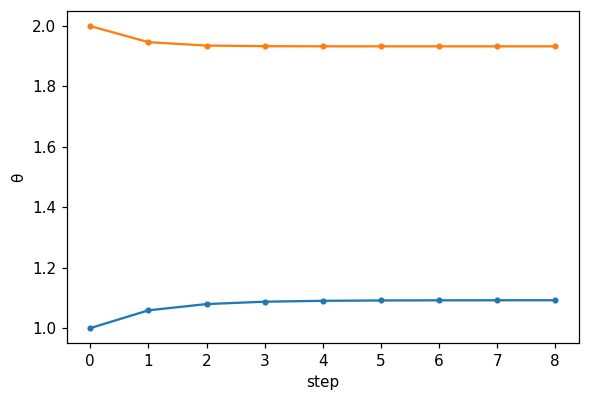

In [22]:
plt.plot([h["θ"]["θ1"] for h in result.history], ".-")
plt.plot([h["θ"]["θ2"] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [23]:
import sys
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

### Scalar

In [24]:
# define 
def gen_funnel(x=None, θ=None, rng_seeder=None):
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true, rng_seeder=rng)).prior.x[0,0]

# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [25]:
result = prob.solve(0., rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▊         | 87/1010 [00:00<00:01, 861.63it/s]

 17%|█▋        | 174/1010 [00:00<00:01, 519.29it/s]

 23%|██▎       | 234/1010 [00:00<00:01, 429.79it/s]

 30%|███       | 304/1010 [00:00<00:01, 404.10it/s]

 40%|███▉      | 400/1010 [00:00<00:01, 536.23it/s]

 46%|████▌     | 463/1010 [00:00<00:01, 463.02it/s]

 51%|█████     | 516/1010 [00:01<00:01, 410.53it/s]

 60%|██████    | 607/1010 [00:01<00:00, 419.66it/s]

 70%|██████▉   | 704/1010 [00:01<00:00, 530.79it/s]

 76%|███████▌  | 766/1010 [00:01<00:00, 465.44it/s]

 81%|████████  | 819/1010 [00:01<00:00, 415.14it/s]

 90%|█████████ | 910/1010 [00:02<00:00, 423.02it/s]

100%|█████████▉| 1009/1010 [00:02<00:00, 533.21it/s]

100%|██████████| 1010/1010 [00:02<00:00, 477.30it/s]

In [26]:
[h["θ"] for h in result.history]

[0.0,
 array([1.30363499]),
 array([1.14695937]),
 array([1.07392309]),
 array([1.02450847]),
 array([1.02850517]),
 array([1.02980893]),
 array([1.03023694]),
 array([1.03037775]),
 array([1.0304241])]

/home/runner/.cache/pypoetry/virtualenvs/muse-inference-8TQ0v75b-py3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


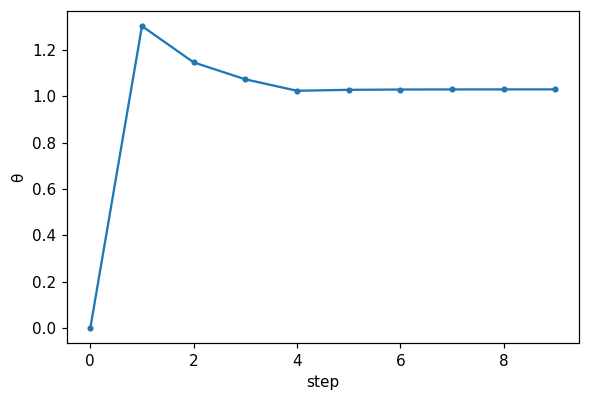

In [27]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [28]:
# define 
def gen_funnel(x=(None,None), θ=(None,None), rng_seeder=None, N=3):
    (α, β) = θ
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        α = pm.Normal("α", 0, 3) if α is None else α
        β = pm.Normal("β", 0, 3) if β is None else β
        z1 = pm.Normal("z1", 0, np.exp(α / 2), size=N)
        z2 = pm.Normal("z2", 0, np.exp(β / 2), size=N)
        x1 = pm.Normal("x1", z1, 1, observed=x[0])
        x2 = pm.Normal("x2", z2, 1, observed=x[1])
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
θ = (-1, 3)
prior = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ, rng_seeder=rng)).prior
x_obs = (prior.x1, prior.x2)

In [29]:
# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [30]:
result = prob.solve((0,0), α=0.3, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

 10%|█         | 102/1010 [00:00<00:03, 302.32it/s]

 20%|██        | 203/1010 [00:00<00:02, 278.17it/s]

 27%|██▋       | 271/1010 [00:00<00:02, 274.36it/s]

 30%|███       | 304/1010 [00:01<00:03, 209.08it/s]

 40%|████      | 405/1010 [00:01<00:02, 236.35it/s]

 50%|█████     | 506/1010 [00:02<00:02, 250.40it/s]

 60%|██████    | 607/1010 [00:02<00:01, 258.38it/s]

 70%|███████   | 708/1010 [00:02<00:01, 264.58it/s]

 80%|████████  | 809/1010 [00:03<00:00, 268.73it/s]

 90%|█████████ | 910/1010 [00:03<00:00, 274.43it/s]

100%|██████████| 1010/1010 [00:03<00:00, 286.33it/s]

In [31]:
[h["θ"] for h in result.history]

[(0, 0),
 (-0.2815542650152186, 6.477243065481232),
 (-0.5141747017993881, 6.117638105986346),
 (-0.6918288059307816, 5.771206936941405),
 (-0.8177009896792248, 5.439946228160347),
 (-0.9018400316593392, 5.126349650147274),
 (-0.9572251933169915, 4.833422582078036),
 (-0.9973477714739579, 4.564419027380707),
 (-1.0313059723290432, 4.322361248178538),
 (-1.0403874945099805, 4.1095482019757394)]

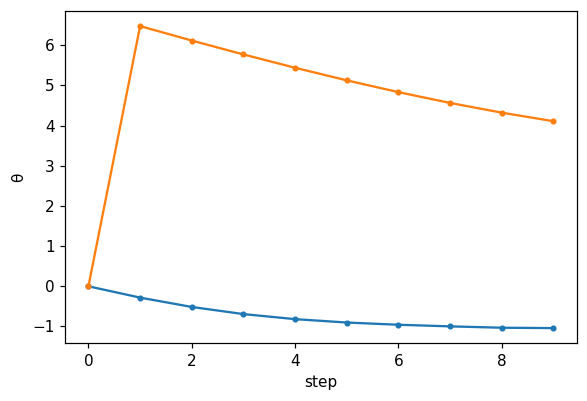

In [32]:
plt.plot([h["θ"][0] for h in result.history], ".-")
plt.plot([h["θ"][1] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");